<a href="https://colab.research.google.com/github/adityacodes-root/AIML-Labs/blob/main/Lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install kagglehub -q

import kagglehub
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

%matplotlib inline
plt.rcParams['figure.figsize'] = (7,5)


In [4]:
# latest version
path = kagglehub.dataset_download("unsdsn/world-happiness")
print("Path to dataset file:", path)

# Read CSV file
import os
files = os.listdir(path)
print("Files in dataset:", files)

# load csv
df = pd.read_csv(os.path.join(path, files[0]))
print(df.shape)
df.head()


Using Colab cache for faster access to the 'world-happiness' dataset.
Path to dataset files: /kaggle/input/world-happiness
Files in dataset: ['2015.csv', '2017.csv', '2019.csv', '2018.csv', '2016.csv']
(158, 12)


,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


Using Colab cache for faster access to the 'world-happiness' dataset.
Files in dataset path: ['2015.csv', '2017.csv', '2019.csv', '2018.csv', '2016.csv']

 Dataset loaded successfully!
       Country  Happiness.Rank  Happiness.Score  Whisker.high  Whisker.low  \
0       Norway               1            7.537      7.594445     7.479556   
1      Denmark               2            7.522      7.581728     7.462272   
2      Iceland               3            7.504      7.622030     7.385970   
3  Switzerland               4            7.494      7.561772     7.426227   
4      Finland               5            7.469      7.527542     7.410458   

   Economy..GDP.per.Capita.    Family  Health..Life.Expectancy.   Freedom  \
0                  1.616463  1.533524                  0.796667  0.635423   
1                  1.482383  1.551122                  0.792566  0.626007   
2                  1.480633  1.610574                  0.833552  0.627163   
3                  1.564980  1.516912 

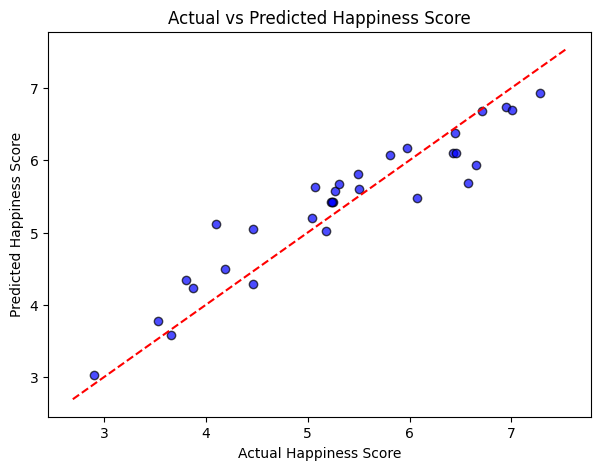

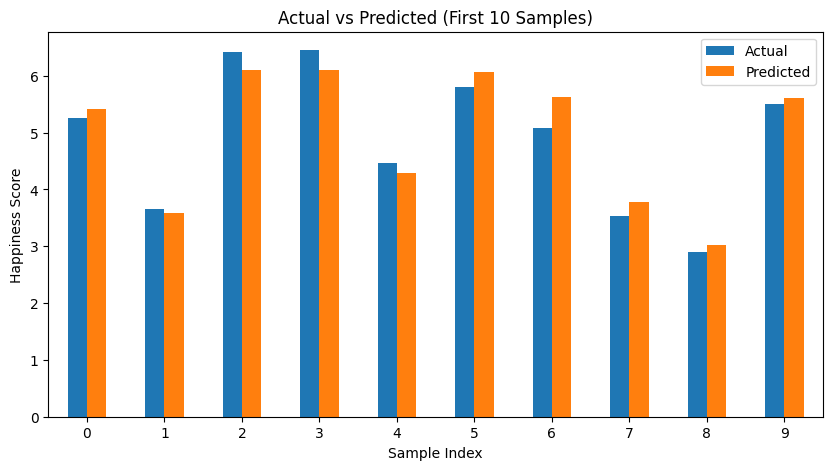

In [5]:

path = kagglehub.dataset_download("unsdsn/world-happiness")
print("Files in dataset path:", os.listdir(path))

# loading dataset
df = pd.read_csv(path + "/2017.csv")
print("\n Dataset loaded successfully!")
print(df.head())

TARGET = 'Happiness.Score'

# Drop target + derived columns (they leak information)
columns_to_drop = [
    TARGET,
    'Country',
    'Happiness.Rank',
    'Whisker.high',
    'Whisker.low',
    'Dystopia.Residual'
]

X = df.drop(columns=columns_to_drop, errors='ignore')
y = df[TARGET]

# Keep only numeric columns
X = X.select_dtypes(include=[np.number])

print("\n Selected Features:", X.columns.tolist())
print("Target present in features?", TARGET in X.columns)
print("X shape:", X.shape, "| y shape:", y.shape)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("\n Train-test split done!")
print("Train size:", X_train.shape[0], "| Test size:", X_test.shape[0])
model = LinearRegression()
model.fit(X_train, y_train)
print("\n Model training completed!")

# prediction + evaluation
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\n📊 Model Evaluation")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R² Score: {r2:.4f}")

# Scatter plot: Actual vs Predicted
plt.figure(figsize=(7, 5))
plt.scatter(y_test, y_pred, alpha=0.7, color='blue', edgecolors='k')
plt.xlabel("Actual Happiness Score")
plt.ylabel("Predicted Happiness Score")
plt.title("Actual vs Predicted Happiness Score")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  # 45°
plt.show()

# First 10 samples
results = pd.DataFrame({'Actual': y_test.values, 'Predicted': y_pred})
results = results.reset_index(drop=True)

results.head(10).plot(kind='bar', figsize=(10, 5))
plt.title("Actual vs Predicted (First 10 Samples)")
plt.xlabel("Sample Index")
plt.ylabel("Happiness Score")
plt.xticks(rotation=0)
plt.legend(loc='best')
plt.show()
